<a href="https://colab.research.google.com/github/PariaNajafi/Deep-Learning-BootCamp/blob/main/Deep_Learning_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#last

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchsummary

import torchvision
from torchvision.datasets import STL10, MNIST, CIFAR10, FashionMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [ ]:
if torch.cuda.is_available():
  print(f"GPU is available: {torch.cuda.get_device_name(0)}")

else:
  print("No GPU found. Running on CPU")

GPU is available: Tesla T4


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### simple CNN

In [ ]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1, stride = 1)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1, stride= 1)

    self.fc1 = nn.Linear(32*7*7,128)
    self.fc2 = nn.Linear(128,10)
    self.pool = nn.MaxPool2d((2, 2), stride = 2)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.pool(x)

    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)

    x = x.view(-1, 32*7*7)

    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x



In [ ]:
#create model instance
model = SimpleCNN()

#print summary
torchsummary.summary(model, input_size = (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3           [-1, 32, 14, 14]           4,640
         MaxPool2d-4             [-1, 32, 7, 7]               0
            Linear-5                  [-1, 128]         200,832
            Linear-6                   [-1, 10]           1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.18
Params size (MB): 0.79
Estimated Total Size (MB): 0.97
----------------------------------------------------------------


### AlexNet

In [ ]:
class AlexNet(nn.Module):
  def __init__(self):
    super(AlexNet, self).__init__()
    self.conv1 = nn.conv2d(3, 96, kernel_size=11, padding=0, stride = 4)
    self.conv2 = nn.conv2d(96, 256, kernel_size=5, padding=2, stride= 1)
    self.conv3 = nn.conv2d(256, 384, kernel_size=3, padding=1, stride = 1)
    self.conv4 = nn.conv2d(384, 384, kernel_size=3, padding=1, stride= 1)
    self.conv5 = nn.conv2d(384, 256, kernel_size=3, padding=1, stride= 1)
    self.pool = nn.MaxPool2d((3, 3), stride= 2, padding=0)

    self.fc1 = nn.linear(256*6*6,4096)
    self.fc2 = nn.linear(4096,4096)
    self.fc3 = nn.linear(4096,10)

    self.bn1 = nn.BatchNorm2d(96)
    self.bn2 = nn.BatchNorm2d(256)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.bn1(x)
    x = self.pool(F.relu(self.conv2(x)))
    x = self.bn2(x)
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = self.pool(F.relu(self.conv5(x)))
    x = x.veiw(-1, 256* 6 *6)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

#create model instance
model = AlexNet()

#Print summery
torchsummary.summary(model, input_size = (3, 227, 227))

###VGG

In [ ]:
class VGG(nn.Module):
  def __init__(self):
    super(VGG, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding='same', stride = 1)
    self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding='same', stride = 1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding='same', stride= 1)
    self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding='same', stride= 1)
    self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding='same', stride = 1)
    self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding='same', stride = 1)
    self.conv7 = nn.Conv2d(256, 512, kernel_size=3, padding="same", stride= 1)
    self.conv8 = nn.Conv2d(512, 512, kernel_size=3, padding='same', stride= 1)
    self.pool = nn.MaxPool2d((2, 2), stride= 2)

    self.fc1 = nn.Linear(512*7*7,4096)
    self.fc2 = nn.Linear(4096,4096)
    self.fc3 = nn.Linear(4096,1000)
    self.fc4 = nn.Linear(1000,10)

    self.bn1 = nn.BatchNorm2d(64)
    self.bn2 = nn.BatchNorm2d(128)
    self.bn3 = nn.BatchNorm2d(256)
    self.bn4 = nn.BatchNorm2d(512)

  def forward(self, x):

    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.bn1(x)
    x = self.pool(x)

    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = self.bn2(x)
    x = self.pool(x)

    x = F.relu(self.conv5(x))
    x = F.relu(self.conv6(x))
    x = self.bn3(x)
    x = self.pool(x)

    x = F.relu(self.conv7(x))
    x = F.relu(self.conv8(x))
    x = F.relu(self.conv8(x))
    x = self.bn4(x)
    x = self.pool(x)

    x = F.relu(self.conv8(x))
    x = F.relu(self.conv8(x))
    x = F.relu(self.conv8(x))
    x = self.bn4(x)
    x = self.pool(x)

    x = x.view(-1, 512* 7 *7)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

#create model instance
model = VGG()

#Print summery
torchsummary.summary(model, input_size = (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
            Conv2d-2         [-1, 64, 224, 224]          36,928
       BatchNorm2d-3         [-1, 64, 224, 224]             128
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,856
            Conv2d-6        [-1, 128, 112, 112]         147,584
       BatchNorm2d-7        [-1, 128, 112, 112]             256
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         295,168
           Conv2d-10          [-1, 256, 56, 56]         590,080
      BatchNorm2d-11          [-1, 256, 56, 56]             512
        MaxPool2d-12          [-1, 256, 28, 28]               0
           Conv2d-13          [-1, 512, 28, 28]       1,180,160
           Conv2d-14          [-1, 512,

###run mnist Dataset

In [ ]:

transform = transforms.Compose([
    #transforms.Resize((96, 96)),  # Resize to match input size
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Normalize to [-1, 1]
])

# Load MNIST dataset
batch_size = 32
train_dataset = MNIST(root="./data", download=True, transform=transform)
test_dataset = MNIST(root="./data",  download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True
                          #, num_workers=4
                          )
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False
                         #, num_workers=4
                         )

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
#Training Loop
epochs = 5
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader): .4f}")

Epoch 1, Loss:  2.2623
Epoch 2, Loss:  1.8427
Epoch 3, Loss:  0.6879
Epoch 4, Loss:  0.4069
Epoch 5, Loss:  0.3282


###ALEXNET Sequential

In [ ]:
class AlexNetSeq(nn.Module):
  def __init__(self, num_classes = 10):
    super(AlexNetSeq, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
        nn.ReLU(inplace= True),
        nn.MaxPool2d(kernel_size=3, stride=2),

        nn.Conv2d(64, 192, kernel_size=5, padding=2),
        nn.ReLU(inplace= True),
        nn.MaxPool2d(kernel_size=3, stride=2),

        nn.Conv2d(192,384, kernel_size=3, padding=1),
        nn.ReLU(inplace= True),

        nn.Conv2d(384,256, kernel_size=3, padding=1),
        nn.ReLU(inplace= True),


        nn.Conv2d(256,256, kernel_size=3, padding=1),
        nn.ReLU(inplace= True),
        nn.MaxPool2d(kernel_size=3, stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Dropout(),
        nn.Linear(256*6*6, 4096),
        nn.ReLU(inplace=True),

        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, num_classes),
    )

  def forward(self, x):
    x = self.features(x)
    x = torch.flatten(x, 1)
    x = self.classifier(x)
    return x



###Run CIFAR10 Dataset

In [ ]:

transform = transforms.Compose([
    transforms.Resize(224),  # Resize to match alexnet input size
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Normalize to [-1, 1]
])

train_dataset = CIFAR10(root="./data", download=True, transform=transform, train =True)
test_dataset = CIFAR10(root="./data",  download=True, transform=transform, train =False)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True )
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:04<00:00, 41.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
images, labels = next(iter(test_loader))
print(f"shape of input batch: {images.shape}")


shape of input batch: torch.Size([64, 3, 224, 224])


In [ ]:
model = AlexNetSeq(num_classes = 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [ ]:
#Training Loop
epochs = 20
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader): .4f}")

KeyboardInterrupt: 

In [ ]:
# save model
torch.save(model.state_dict(), "alexnet_cifar10.pth")

###run fashion_MNIST dataset

In [ ]:

transform = transforms.Compose([
    transforms.Resize((224,224)),  # Resize to match alexnet input size
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Normalize to [-1, 1]
])

train_dataset = FashionMNIST(root="./data", download=True, transform=transform, train =True)
test_dataset = FashionMNIST(root="./data",  download=True, transform=transform, train =False)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True )
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
images, labels = next(iter(test_loader))
print(f"shape of input batch: {images.shape}")

shape of input batch: torch.Size([64, 1, 224, 224])


In [ ]:
model = AlexNetSeq(num_classes = 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [ ]:
#Training Loop
epochs = 20
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader): .4f}")

Epoch 1, Loss:  0.6075
Epoch 2, Loss:  0.3779
Epoch 3, Loss:  0.3374
Epoch 4, Loss:  0.3195
Epoch 5, Loss:  0.2983
Epoch 6, Loss:  0.2897
Epoch 7, Loss:  0.2825
Epoch 8, Loss:  0.2701
Epoch 9, Loss:  0.2581
Epoch 10, Loss:  0.2591
Epoch 11, Loss:  0.2503
Epoch 12, Loss:  0.2529
Epoch 13, Loss:  0.2462
Epoch 14, Loss:  0.2289
Epoch 15, Loss:  0.2280
Epoch 16, Loss:  0.2314
Epoch 17, Loss:  0.2252
Epoch 18, Loss:  0.2198
Epoch 19, Loss:  0.2272
Epoch 20, Loss:  0.2125


In [ ]:
def evaluate(model, test_loader):
  correct=0
  total = 0
  with torch.no_grad():
    for images, labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  print(f"Test Accuracy: {accuracy: .2f}%")
  return accuracy

evaluate(model, test_loader)


Test Accuracy:  90.67%


90.67

###Evaluate the model


In [ ]:
def evaluate(model, test_loader):
  correct=0
  total = 0
  with torch.no_grad():
    for images, labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  print(f"Test Accuracy: {accuracy: .2f}%")
  return accuracy

evaluate(model, test_loader)


Test Accuracy:  56.92%


56.92

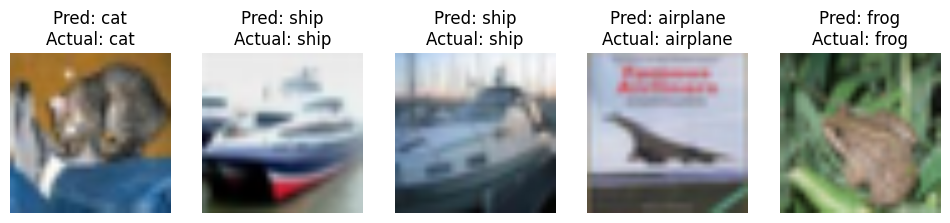

In [ ]:
def show_predictions(model, test_loader, num_images=5):
  classes = test_dataset.classes #class names(cifar10 labels)
  model.eval()

  images, labels = next(iter(test_loader))
  images, labels = images. to(device), labels.to(device)
  outputs  = model(images)
  _,predicted = torch.max(outputs, 1)

  fig, axes = plt.subplots(1, num_images, figsize=(12, 4))
  for i in range(num_images):
    img = images[i].cpu().numpy().transpose((1, 2, 0)) # conver to correct format
    img = (img *0.5) + 0.5  #unnormalize
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Pred: {classes[predicted[i].item()]}\nActual: {classes[labels[i].item()]}")

  plt.show()

show_predictions(model, test_loader)

###non use

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs  = model(images)
    _,predicted = torch.max(outputs, 1)
    total += labels.size(0)


In [ ]:

#Data Loader
def data_loader(data_dir, batch_size, random_seed=42, shuffle=True, test=False):
  transforms.Normalize(
      mean = [0.4914, 0.4822, 0.4465],
      std = [0.2023, 0.1994, 0.2010]
  )
  #define transforms
  transform = transforms.Compose([
      transforms.Resize((227,227)),
      transforms.ToTensor(),
      normalize
  ])
  if test:
    dataset = dataset.CIFAR10(
        root = data_dir,
        train = False,
        download = True,
        transform = transform
    )
    data_loader = torch.utils.DataLoader(
        dataset, batch_size=batch_size, shuffle= shuffle
    )
    return data_loader

# load the dataset
train_dataset = datasets.CIFAR10(
        root = data_dir,
        train = False,
        download = True,
        transform = transform
)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
image_path = '/content/drive/MyDrive/image_2024-09-11_21-38-06.png'

In [ ]:
image =

In [ ]:
def preprocess_image(image_path):
  image = Image.open(image_path)

  transform = transform.compose([
      transform.Resize((224, 224)),
      transforms.toTensor()
  ])

  image_transformed =  transform(image)
  transform_aug = transforms.Compose([
      transforms.RandomHorizontalFlip(),
      transforms.ColorJitter(brigthness = 0.2),
      transforms.RandomRotation(degrees= -10),
      transforms.ToTensor()
  ])
  image_aug = transform_aug(image_transformed)
  plt.imshow(image_aug.permute(1,2,0))

  return image_aug

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#8 March

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
